In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import chi2_contingency

dfh = pd.read_csv("offensivereboundshome.csv")
dfa = pd.read_csv("offensivereboundsaway.csv")
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

AttributeError: module 'matplotlib' has no attribute 'title'

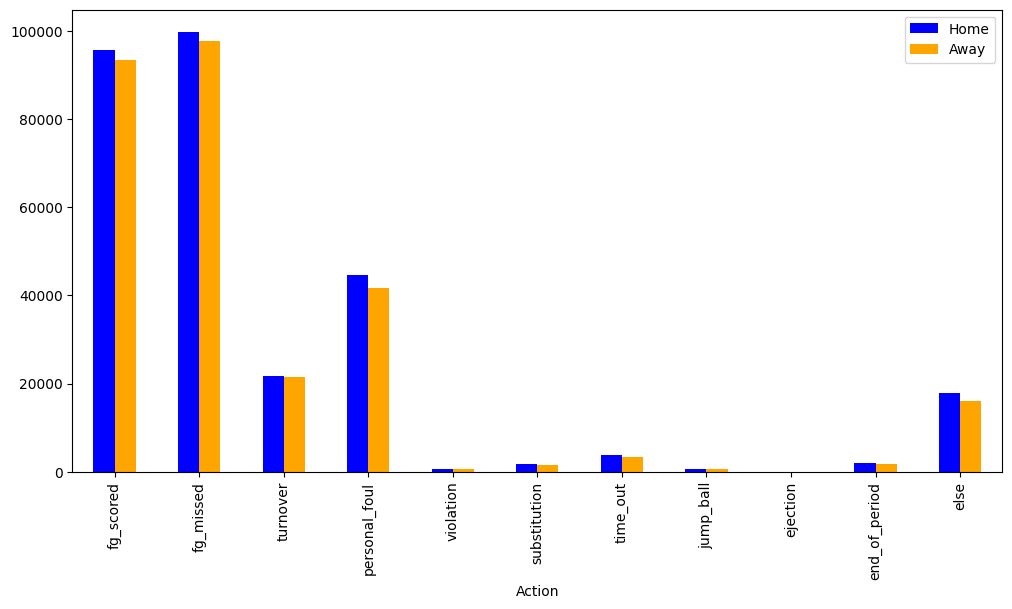

In [19]:
# Combine data for visualization
action_columns = ["fg_scored", "fg_missed", "turnover", "personal_foul", 
                  "violation", "substitution", "time_out", "jump_ball", 
                  "ejection", "end_of_period", "else"]

dfh_actions = dfh[action_columns].sum().reset_index()
dfa_actions = dfa[action_columns].sum().reset_index()

dfh_actions.columns = ["Action", "Home"]
dfa_actions.columns = ["Action", "Away"]

action_summary = pd.merge(dfh_actions, dfa_actions, on="Action")

# Plot action frequencies
action_summary.set_index("Action").plot(kind="bar", figsize=(12, 6), color=["blue", "orange"])
plt.title("Frequency of Actions After Offensive Rebounds")
plt.ylabel("Frequency")
plt.xlabel("Actions")
plt.xticks(rotation=45)
plt.legend(["Home", "Away"])
plt.show()


In [20]:
# Group by year for rebounds and points
rebounds_over_time = (
    dfh.groupby("game_year")["reb_home"].sum().reset_index()
    .merge(dfa.groupby("game_year")["reb_away"].sum().reset_index(), on="game_year")
)

# Plot trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=rebounds_over_time, x="game_year", y="reb_home", label="Home Rebounds")
sns.lineplot(data=rebounds_over_time, x="game_year", y="reb_away", label="Away Rebounds")
plt.title("Trends in Total Rebounds Over Time")
plt.xlabel("Game Year")
plt.ylabel("Total Rebounds")
plt.legend()
plt.show()


TypeError: 'module' object is not callable

In [ ]:
# Plus-Minus Distribution
plt.figure(figsize=(10, 6))
sns.histplot(dfh["plus_minus_home"], kde=True, color="blue", label="Home", alpha=0.6)
sns.histplot(dfa["plus_minus_away"], kde=True, color="orange", label="Away", alpha=0.6)
plt.title("Plus-Minus Distribution (Home vs Away)")
plt.xlabel("Plus-Minus")
plt.legend()
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Two-sample t-test for fg_scored
t_stat, p_val = ttest_ind(dfh["fg_scored"], dfa["fg_scored"], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Home and away teams differ significantly in scoring after offensive rebounds.")
else:
    print("No significant difference in scoring after offensive rebounds.")


In [ ]:
import statsmodels.api as sm

# Home team regression
X_home = dfh["reb_home"]
y_home = dfh["pts_home"]
X_home = sm.add_constant(X_home)  # Add intercept
model_home = sm.OLS(y_home, X_home).fit()
print("Home Team Regression:\n", model_home.summary())

# Away team regression
X_away = dfa["reb_away"]
y_away = dfa["pts_away"]
X_away = sm.add_constant(X_away)  # Add intercept
model_away = sm.OLS(y_away, X_away).fit()
print("Away Team Regression:\n", model_away.summary())


In [ ]:
from scipy.stats import chi2_contingency

# Create contingency table
action_counts = pd.concat(
    [dfh[action_columns].sum(), dfa[action_columns].sum()], axis=1
)
action_counts.columns = ["Home", "Away"]

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(action_counts.T)
print(f"Chi-Square Statistic: {chi2:.2f}, P-value: {p:.4f}")
if p < 0.05:
    print("The distribution of actions differs significantly between home and away teams.")
else:
    print("No significant difference in the distribution of actions between home and away teams.")
